In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## (8) ```Collage``` データセット

### (a) データ読み込み, (b) 大学名列をインデックス化

In [2]:
dataset_path = "./datasets/College.csv"
df = pd.read_csv(dataset_path, index_col=0)

In [3]:
df.head(2)

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56

### (c) i. データの要約

In [4]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

### (c) ii. 散布図行列の表示

[note.nkmk.me](https://note.nkmk.me/python-seaborn-pandas-pairplot/) を参考

In [5]:
import seaborn as sns

/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# 注意! スライスは使えない
# df.iloc[:, [1:10]]

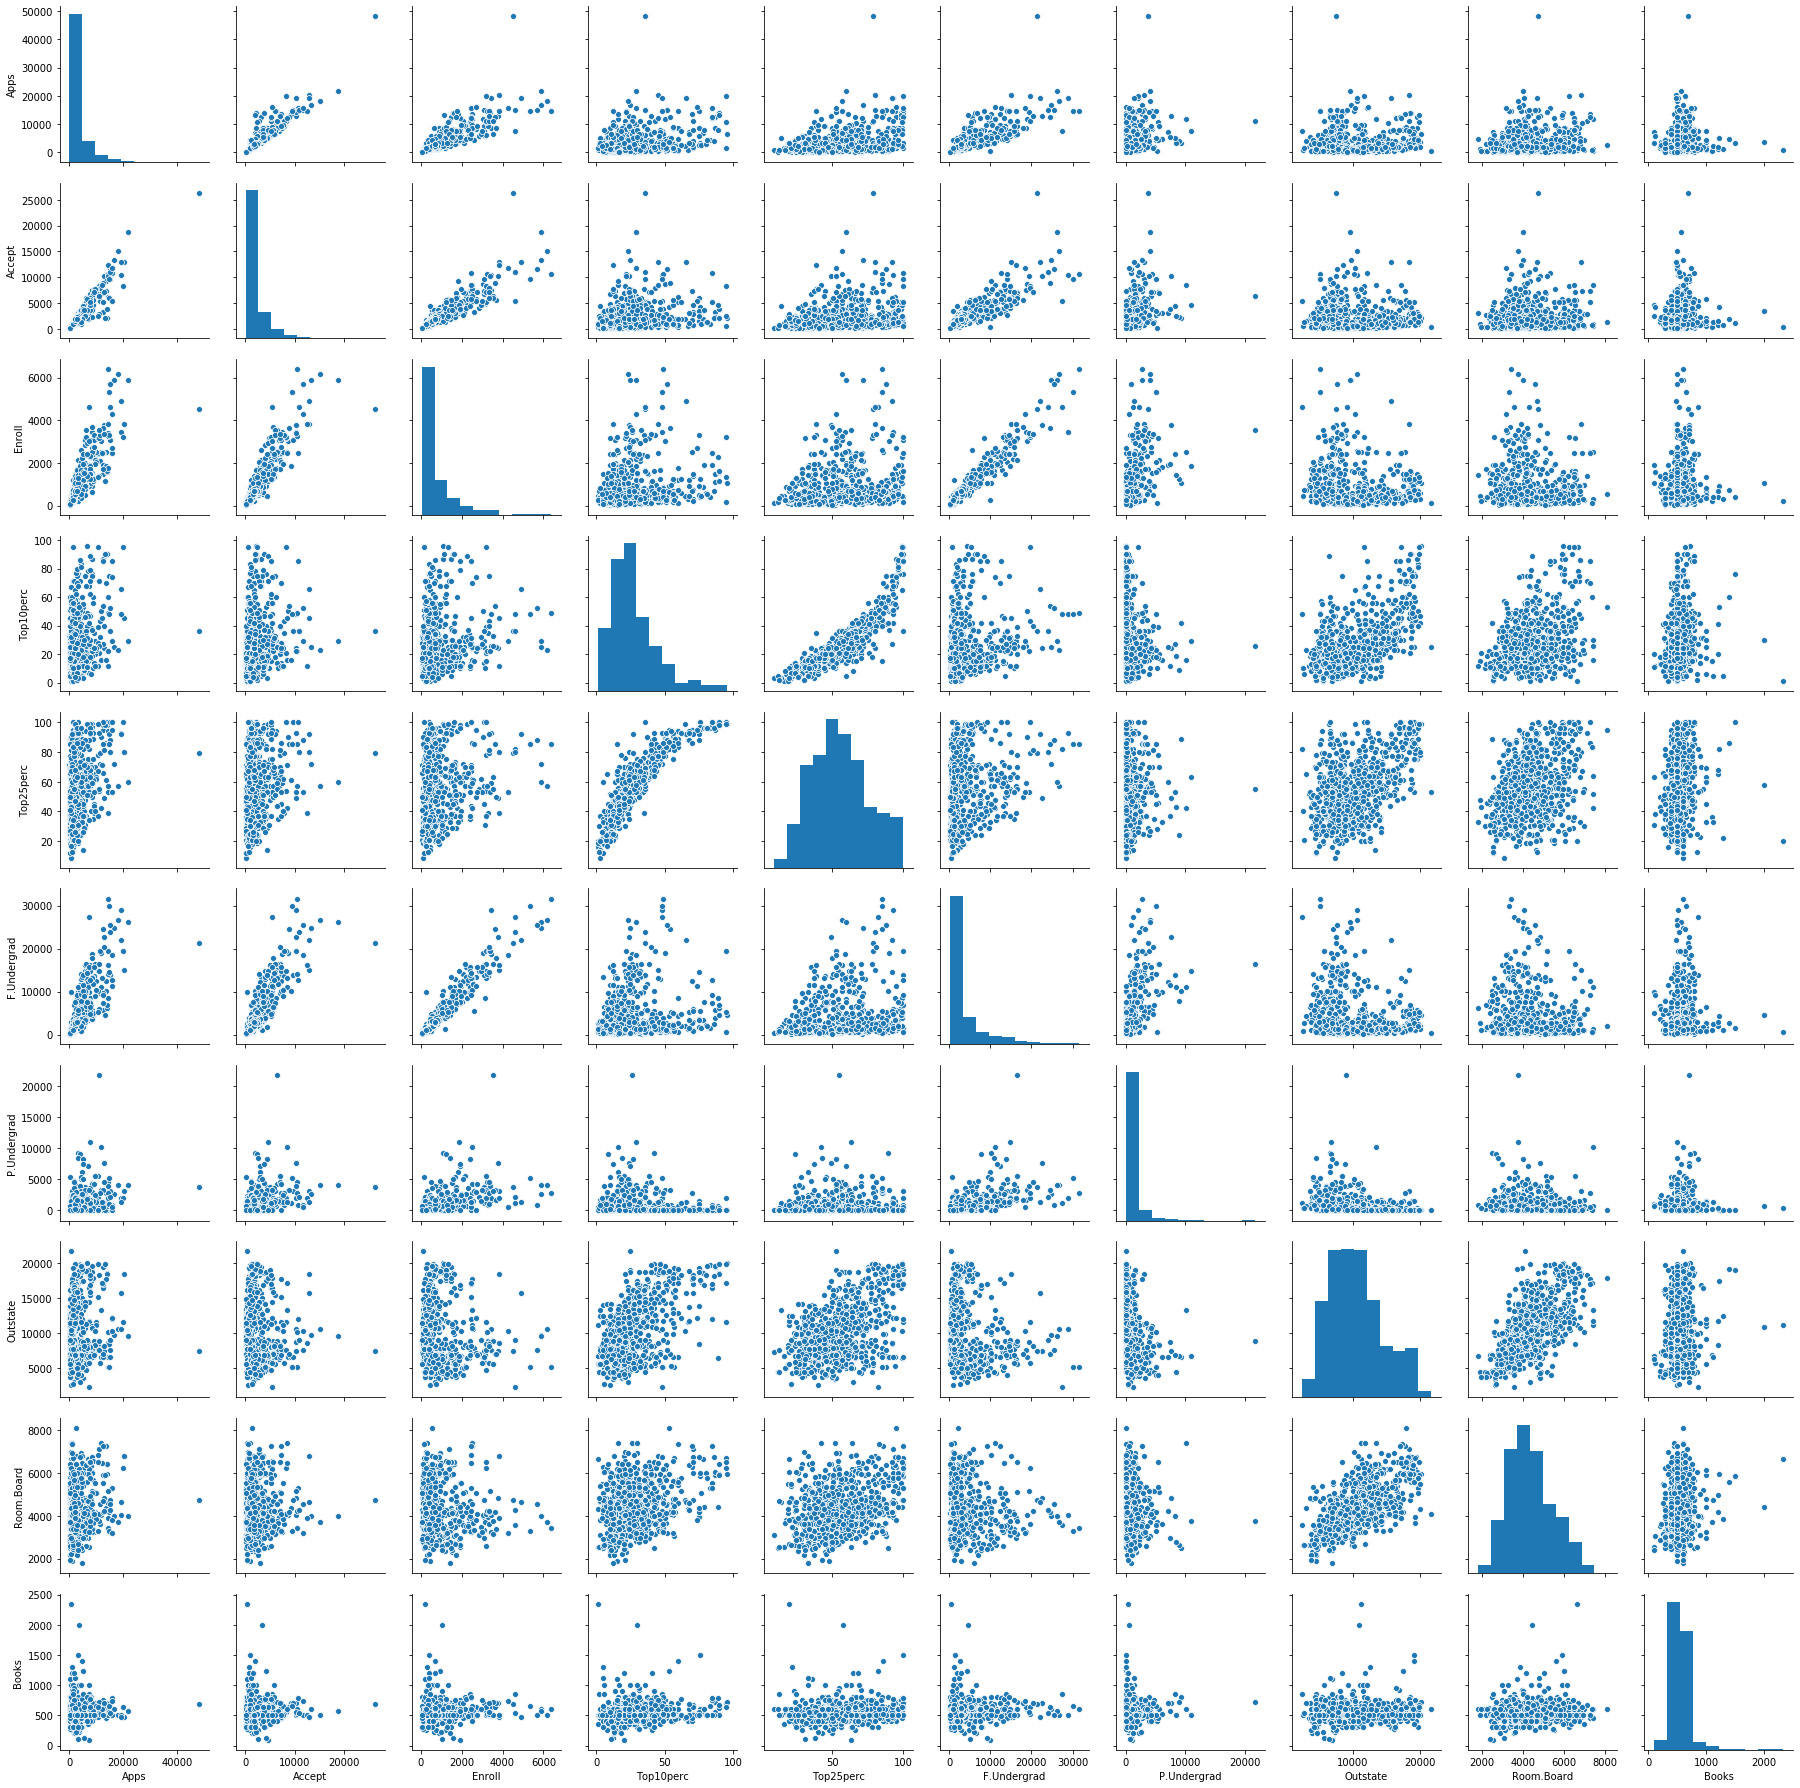

In [8]:
#pg = sns.pairplot(df.columns[1:11].values)
# 下の書き方はいけてない
pg = sns.pairplot(df.iloc[:, [i for i in range(1, 11)]])

### (c) iii. 箱ひげ図の表示

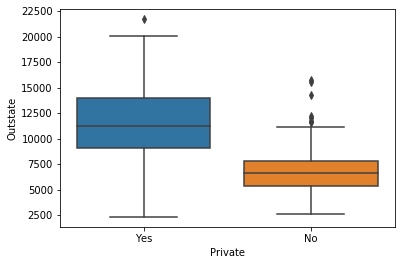

In [9]:
sns.boxplot(x='Private', y='Outstate', data=df)

### (c) iv. エリート校の抽出

In [10]:
def check_elite(percent):
    if percent > 50:
        return 'YES'
    else:
        return 'NO'

In [11]:
df['Elite'] = df['Top10perc'].apply(check_elite)

In [12]:
df['Elite'].head(3)

Abilene Christian University    NO
Adelphi University              NO
Adrian College                  NO
Name: Elite, dtype: object

In [13]:
df['Elite'].describe()

count     777
unique      2
top        NO
freq      699
Name: Elite, dtype: object

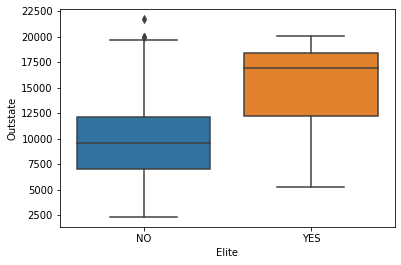

In [14]:
sns.boxplot(x='Elite', y='Outstate', data=df)

### (c) v. ヒストグラム作成

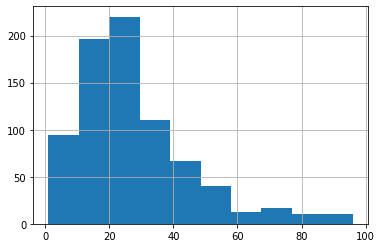

In [15]:
df['Top10perc'].hist()

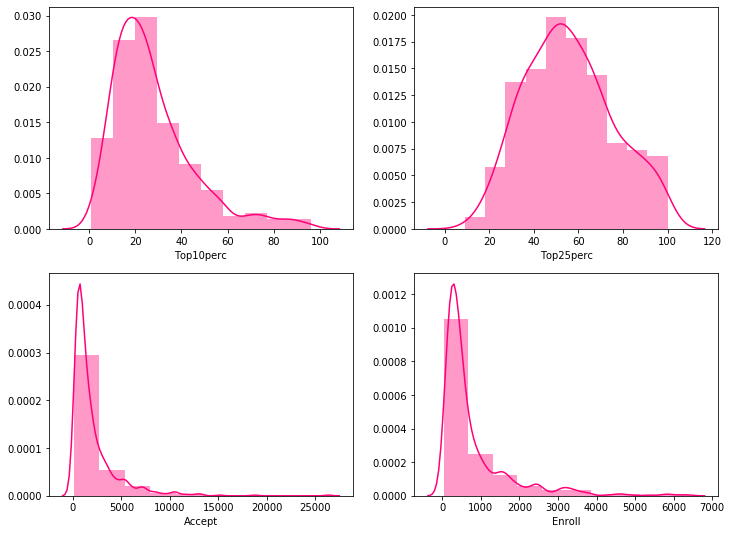

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

# kde=True: カーネル密度関数の描画
sns.distplot(df['Top10perc'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[0,0])
sns.distplot(df['Top25perc'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[0,1])
sns.distplot(df['Accept'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[1,0])
sns.distplot(df['Enroll'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[1,1])

## (9) ```Auto``` データセット

### (b) 量的変数の範囲, (c) 量的変数の平均・標準偏差

In [52]:
dataset_path = "./datasets/Auto.csv"
df = pd.read_csv(dataset_path)
df

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[397 rows x 9 columns]

In [53]:
df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  397.000000  397.000000    397.000000   397.000000    397.000000   
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   
std      7.825804    1.701577    104.379583   847.904119      2.749995   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.000000  2223.000000     13.800000   
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   
75%     29.000000    8.000000    262.000000  3609.000000     17.100000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

             year      origin  
count  397.000000  397.000000  
mean    75.994962    1.574307  
std      3.690005    0.802549  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [54]:
## (d) 10番目から85番目まで削除し、統計情報の出力

In [61]:
df_dropped = df.drop([i for i in range(9, 85)])
df_dropped.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  321.000000  321.000000    321.000000   321.000000    321.000000   
mean    24.438629    5.370717    187.049844  2933.962617     15.723053   
std      7.908184    1.653486     99.635385   810.642938      2.680514   
min     11.000000    3.000000     68.000000  1649.000000      8.500000   
25%     18.000000    4.000000    100.000000  2215.000000     14.000000   
50%     23.900000    4.000000    145.000000  2795.000000     15.500000   
75%     30.700000    6.000000    250.000000  3504.000000     17.300000   
max     46.600000    8.000000    455.000000  4997.000000     24.800000   

             year      origin  
count  321.000000  321.000000  
mean    77.152648    1.598131  
std      3.111230    0.816163  
min     70.000000    1.000000  
25%     75.000000    1.000000  
50%     77.000000    1.000000  
75%     80.000000    2.000000  
max     82.000000    3.000000

### 予測変数同士の関係

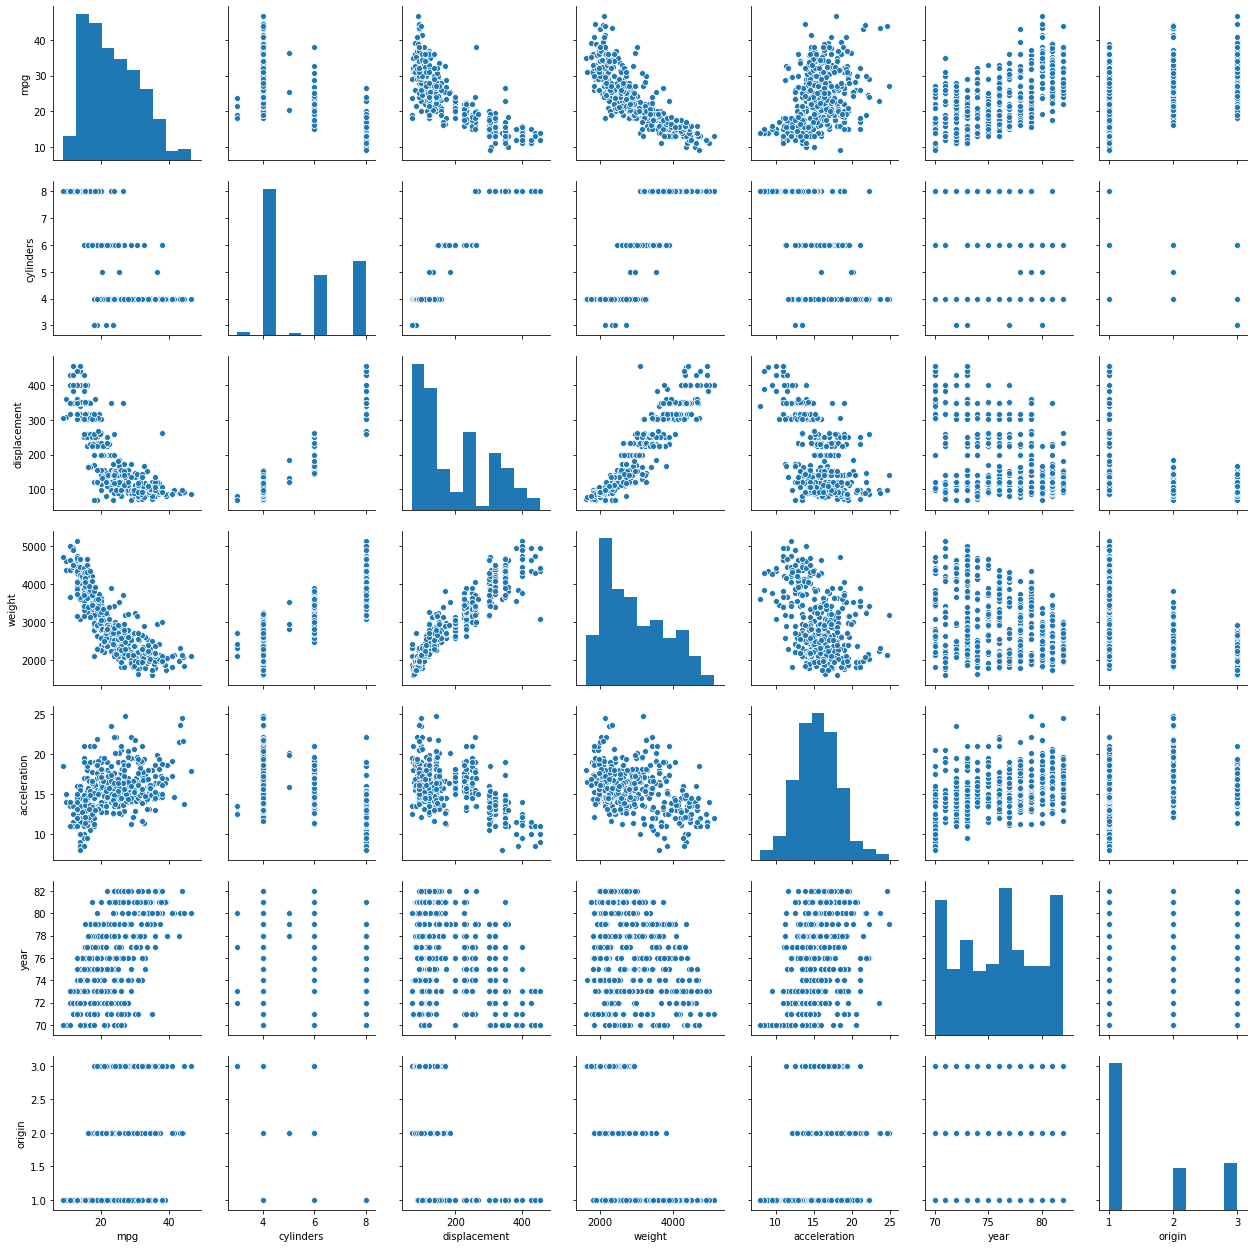

In [64]:
sns.pairplot(df)

## (10) ```Boston``` データセット

### (a) データの読み込み

In [81]:
from sklearn.datasets import load_boston
boston = load_boston()
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [87]:
# :Attribute Information (in order):
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000  
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

In [97]:
df = pd.DataFrame(boston.data, columns=boston['feature_names'])
df['target'] = boston['target']

In [100]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [131]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### (b) 散布図

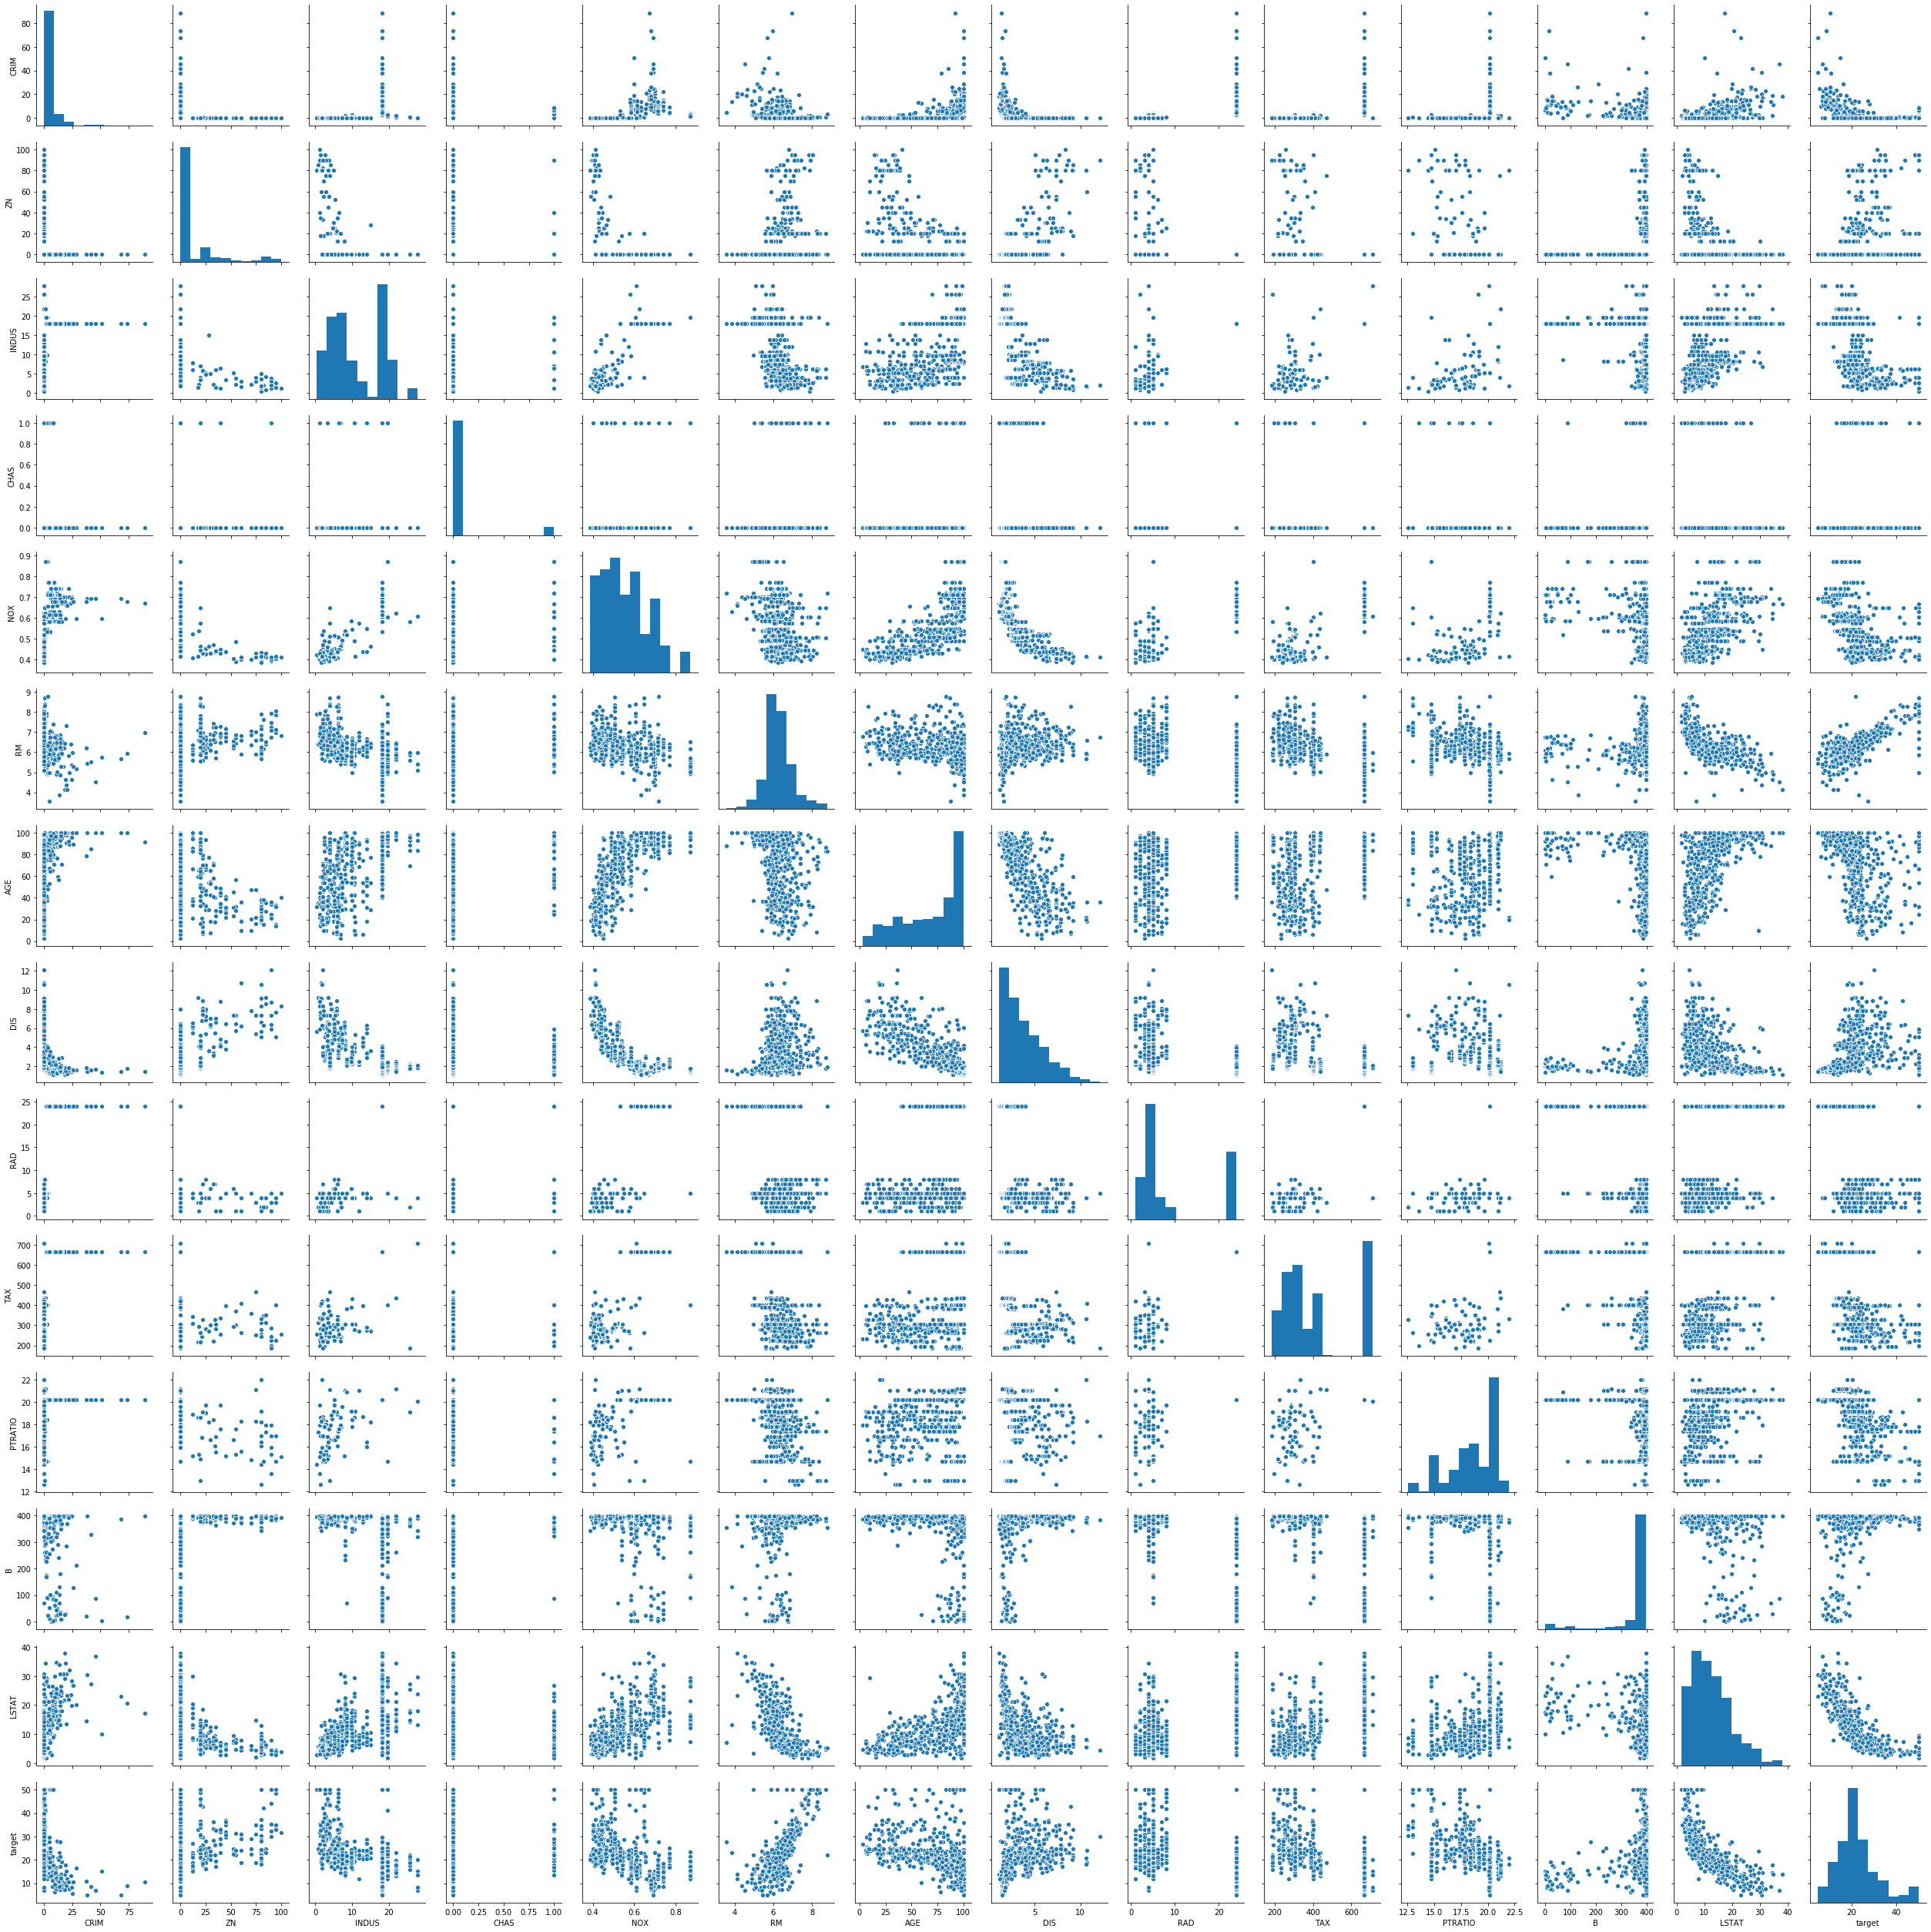

In [98]:
sns.pairplot(df)

### (d) 外れ値の有無

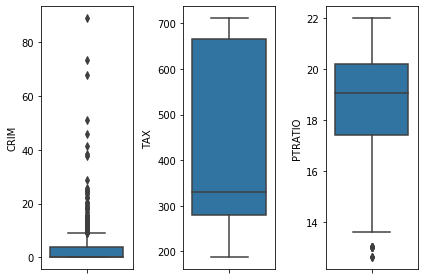

In [114]:
fig, ax = plt.subplots(1, 3)
sns.boxplot(df['CRIM'], orient='v', ax=ax[0])
sns.boxplot(df['TAX'], orient='v', ax=ax[1])
sns.boxplot(df['PTRATIO'], orient='v', ax=ax[2])
plt.tight_layout()

In [133]:
df[['CRIM', 'TAX', 'PTRATIO']].describe()

CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677083  666.000000   20.200000
max     88.976200  711.000000   22.000000

### (e) チャールズ川に接する数

In [129]:
df['CHAS'].astype('int').sum()

35

In [136]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### (f) 生徒・教師比率の中央値

In [142]:
df['PTRATIO'].median()

19.05

### (g) 7, 8部屋以上

In [143]:
df[df['RM'] > 7]

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
2     0.02729   0.0   7.07   0.0  0.4690  7.185  61.1  4.9671   2.0  242.0   
4     0.06905   0.0   2.18   0.0  0.4580  7.147  54.2  6.0622   3.0  222.0   
40    0.03359  75.0   2.95   0.0  0.4280  7.024  15.8  5.4011   3.0  252.0   
55    0.01311  90.0   1.22   0.0  0.4030  7.249  21.9  8.6966   5.0  226.0   
64    0.01951  17.5   1.38   0.0  0.4161  7.104  59.5  9.2229   3.0  216.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
364   3.47428   0.0  18.10   1.0  0.7180  8.780  82.9  1.9047  24.0  666.0   
370   6.53876   0.0  18.10   1.0  0.6310  7.016  97.5  1.2024  24.0  666.0   
375  19.60910   0.0  18.10   0.0  0.6710  7.313  97.9  1.3163  24.0  666.0   
453   8.24809   0.0  18.10   0.0  0.7130  7.393  99.3  2.4527  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.5320  7.061  77.0  3.4106  24.0  666.0   

     PTRATIO       B  LSTAT  target  
2       17.8  392.83   4.03    34.7  
4       18.7  396.90   5.33    36.2  
40      18.3  395.62   1.98    34.9  
55      17.9  395.93   4.81    35.4  
64      18.6  393.24   8.05    33.0  
..       ...     ...    ...     ...  
364     20.2  354.55   5.29    21.9  
370     20.2  392.05   2.96    50.0  
375     20.2  396.90  13.44    15.0  
453     20.2  375.87  16.74    17.8  
482     20.2  395.28   7.01    25.0  

[64 rows x 14 columns]

In [154]:
len(df.query('RM>7')), len(df.query('RM>8')), 

(64, 13)